<a href="https://colab.research.google.com/github/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-04-MACHINE-LEARNING-1/blob/master/09-[TALLER]_Modelos_parametricos_vs_Modelos_no_parametricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Recuerda que una vez abierto, da clic en "Copiar en Drive", de lo contrario no podras alamancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-04-MACHINE-LEARNING-1/master/init.py
import init; init.init(force_download=False); 

# Taller - Parte 1

**Clasificación**

## Ejercicio 1: Contextualización del problema


Usaremos el dataset digits para el problema de clasificación. En el repositorio de sklearn se encuentra más información en el siguiente [link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) .

In [1]:
#configuración del laboratorio
# Ejecuta esta celda!
%load_ext autoreload
%autoreload 2
# for local 

from local.lib.general import configure_lab2
configure_lab2()
from local.lib.lab2 import *
GRADER, x, y = part_1()

lab configuration started
installing libraries
downloading files
lab configured


In [2]:
print ("Número de muestras", x.shape[0])
print ("Número de variables", x.shape[1])
print ("Número de clases", len(np.unique(y)))

Número de muestras 1797
Número de variables 64
Número de clases 10


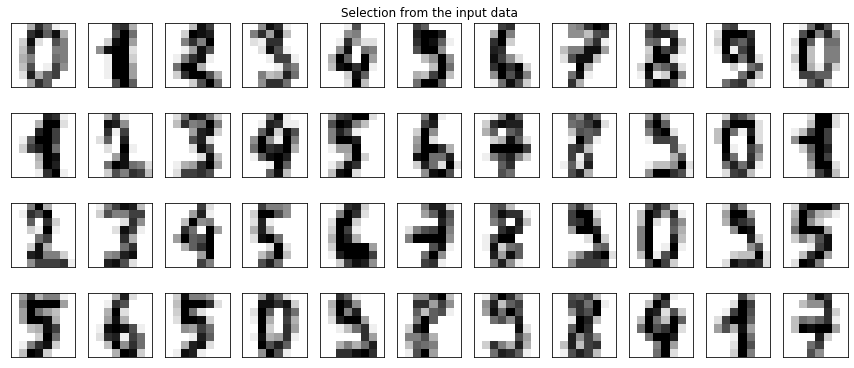

In [3]:
real_data = x[:44].reshape((4, 11, -1))
fig, ax = plt.subplots(5, 11, subplot_kw=dict(xticks=[], yticks=[]),figsize=(15,8))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
ax[0, 5].set_title('Selection from the input data')
plt.show()

En un problema de clasificación de más de una clase, tener un desbalance de muestras puede ser perjudicial para el proceso de entrenamiento. Vamos a crear una función para verificar el numero de muestras por clases.

In [ ]:
#Ejercicio de código
def muestras_por_clases (Y):
    """Funcion que calcula el numero de muestras por cada clase
    Y: vector de numpy con las etiquetas de las muestras del conjunto X
    retorna: diccionario [int/float:int/float] 
        con la estructura:{etiquetaclase1: numero de muestras clase1, etiquetaclase2: numero de muestras clase2}
    """
    dicto = {}
    ## Pista se puede asginar keys a diccionario: dict[etiqueta] = valor
          

    return (dicto)

In [ ]:
## la funcion que prueba tu implementacion
GRADER.run_test("ejercicio1.1", muestras_por_clases)

In [ ]:
# con esta linea de codigo puedes ver la dsitribucion de forma grafica
fig, ax = plt.subplots()
ax.bar(muestras_por_clases(y).keys(), muestras_por_clases(y).values())
ax.set_title("numero de muestras por clase")
ax.set_xlabel("etiqueta de clase")
ax.set_ylabel("# muestras por clase")
ax.set_xticks(list(muestras_por_clases(y).keys()))
plt.show()

## Ejercicio 2: 


Los modelos que provaremos en este taller son:

- Naïve Bayes
- Discriminante Cuadrático
- K-NN
- Parzen Window

De todos ellos el único que no tiene implementación como modelo de clasificación es el último, por lo tanto el objetivo de este punto es programar una clase en python que permita definir clasificadores basados en **Parzen Window**, debe contener un constructor para definir el ancho de la ventana, un método .fit y un método .predict que reciba una matriz de datos (muestras,variables) y retorne la clase asignada a cada muestra.

In [ ]:
#Ejercicio de código
from sklearn.neighbors import KernelDensity

class ParzenWindowClassifier():
    
    def __init__ (self, bandwidth):
        self.bandwidth = bandwidth
        
        #Se sugiere tener una variable para almacenar el número de clases
        self.num_clases = 0
        #Se sugiere tener una lista para almacenar la ventanas de Parzen entrenadas para cada clase
        self.kernelDensity = []
    
    def fit(self,X,Y):
        """Esta funcion es encargada entrenar el modelo, se deben entrenar las distribuciones kernel para cada clase.
        
            Se sugiere verificar que el conjunto de entrada tenga más de dos clases
        """
        clases = np.unique(Y)
        for i in range(clases):
            
            self.kernelDensity.append(...)
        
        return self
        
    def predict(self,X_val):
        """Esta funcion es encargada de realizar una predicción con base en las 
        muestras almacenadas y el ancho de banda definido, para cada una de las muestras en X_val.
        """
                        
        #Debe retornar un vector que contenga las predicciones para cada una de las muestras en X_val, 
        #en el mismo orden y la matriz con las probabilidades por clase
        return class_est, prob

In [ ]:
## la funcion que prueba tu implementacion
GRADER.run_test("ejercicio1.2", ParzenWindowClassifier)

## Ejercicio 3:

En este ejercicio vamos a hacer simulaciones con los diferentes modelos y a seleccionar los hiperparámetros con mejor desempeño. Carguemos los modelos a comparar:

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Dejamos algunas muestras para el proceso de entrenamiento y otras para evaluar qué tan bueno fue el aprendizaje del modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
random.seed(1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.3, random_state=1)


#Normalizamos
scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

Instanciamos y entrenamos los modelos para algunos hiperparámetros por defecto:

In [ ]:
clf = []
clf.append(GaussianNB().fit(Xtrain,Ytrain))
clf.append(QuadraticDiscriminantAnalysis().fit(Xtrain,Ytrain))
clf.append(KNeighborsClassifier(n_neighbors=1).fit(Xtrain,Ytrain))
clf.append(ParzenWindowClassifier(bandwidth=0.1).fit(Xtrain,Ytrain))

Veamos cómo se comportan para algunas muestras de test. **Ejecute la celda varias veces para observar diferentes resultados**

In [ ]:
ind = np.random.permutation(Xtest.shape[0])[0]
print('real class')
print(Ytest[ind])

for i in range(4):
    if i==3:
        _,preds = clf[i].predict(Xtest[ind,:].reshape(1,-1))
    else:
        preds = clf[i].predict_proba(Xtest[ind,:].reshape(1,-1))
    y_pos = np.arange(len(np.unique(y)))
    performance = preds.flatten()
    plt.subplot(121)
    plt.imshow(Xtest[ind,:].reshape(8,8), cmap='gray');
    plt.subplot(122) 
    plt.barh(y_pos, performance, align='center', alpha=0.5)
    plt.yticks(y_pos, np.unique(y))
    plt.xlabel('Probability')
    plt.title('Models outputs')
    plt.subplots_adjust(wspace = 1)
    plt.show()

Evaluemos el desempeño en todo el conjunto de test para diferentes hiperparámetros

In [ ]:
#Ejercicio de código
from sklearn.metrics import accuracy_score
k = range(1,16)
h = np.linspace(0.001,10,15)
acc_knn = []
acc_pw = []
for i in range(len(k)):
    clf1 = KNeighborsClassifier(n_neighbors=k[i]).fit(Xtrain,Ytrain)
    clf2 = ParzenWindowClassifier(bandwidth=h[i]).fit(Xtrain,Ytrain)
    y_pred_knn = 
    y_pred_pw,_ = 
    acc_knn.append(accuracy_score(Ytest,y_pred_knn)) 
    acc_pw.append(accuracy_score(Ytest,y_pred_pw)) 

Grafiquemos el resultado:

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(k,np.array(acc_knn))
plt.title('Desempeño para el k-nn')
plt.xlabel('Número de vecinos')
plt.ylabel('Exactitud')
plt.grid()
plt.subplot(122)
plt.plot(h,np.array(acc_pw))
plt.title('Desempeño para el método kernel')
plt.xlabel('Ancho de banda')
plt.ylabel('Exactitud')
plt.grid()

In [ ]:
print(f'Mejore resultado para k-nn {np.max(np.array(acc_knn))}')
print(f'Mejore resultado para PW {np.max(np.array(acc_pw))}')

Mida el desempeño para los Modelos Naïve Bayes y Discriminante Cuadrático:

In [ ]:
#Ejercicio de código
clf = GaussianNB().fit(Xtrain,Ytrain)
y_pred_nb = clf.predict(Xtest)

clf = QuadraticDiscriminantAnalysis().fit(Xtrain,Ytrain)
y_pred_qd = clf.predict(Xtest)

print(f'Mejore resultado para Naïve Bayes {accuracy_score(Ytest,y_pred_nb)}')
print(f'Mejore resultado para Discriminante Cuadrático {accuracy_score(Ytest,y_pred_qd)}')

In [ ]:
#@title Pregunta Abierta
#@markdown  ¿Cuáles tipos de modelos obtuvieron mejores resultados?
respuesta_1 = "" #@param {type:"string"}

In [ ]:
#@title Pregunta Abierta
#@markdown  ¿Cuál fue el modelo con peor desempeño? ¿Cuál cree que es la razón para dicho comportamiento?
respuesta_2 = "" #@param {type:"string"}

Grafique la matriz de confusión normalizada del mejor modelo.

In [ ]:
#Ejercicio de código

In [ ]:
GRADER.check_tests()

In [ ]:
#@title Integrantes
codigo_integrante_1 ='' #@param {type:"string"}

----
Esta linea es de uso exclusivo del los profesores

In [ ]:
GRADER.grade()

# Taller - Parte 2

**Regresión**

In [ ]:
GRADER, x, y = part_2()

## Ejercicio 2.1: Contextualización del problema

Para el problema de regresion usaremos la base de datos 'The Boston Housing Dataset', cuya descripción [pueden encontrarla aqui](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). La información ya esta cargada dentro del notebook

In [ ]:
print("muestra de los 3 primeros renglones de x:\n", x[0:3, :])
print("muestra de los 3 primeros renglones de y:\n", y[0:3])
print ("Número de muestras", x.shape[0])
print ("Número de variables", x.shape[1])

En los problemas de regresión, es muy util explorar la distribución de la variable objetivo. Nuestro primer ejercicio consiste en:
1. visualizar un histograma de la variable y 
2. retornar los intervalo de datos mas frecuente.

Pistas: 
1. explorar la documentación de [plt.hist](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html). Maneje los valores por defecto. ¿como se puede usar la salida del histograma para retorna el intervalo de datos mas frecuente?

In [ ]:
#ejercicio de código
def plot_hist_and_get_freq_int(Y):
    """función que grafica el histograma de la variable 'Y'
        y retorna el intervalo donde ocurren con mas frecuencia los
        valores de 'Y'
        Y: numpy array con la variable a graficar
        retorna: una tupla (int/float, int/float, int/float) 
            el primer elemento es el limite inferior del intervalo donde ocurren los valores
            mas frecuentes
            el segundo elemento es el limite superior del intervalo donde ocurren los valores
            mas frecuentes
            el tercer elemento es la frecuencia del intervalo anterior
            va observar un cuarto elemento a retornar, el cual es usado para confirmar que
            se realizo la grafica correctamente
    """
    
    plt.hist()
    lim_inf = 
    lim_sup = 
    freqs = 
    
    # el cuarto elemento debe dejarlo
    return (lim_inf, lim_sup, freqs, plt.gcf())

In [ ]:
## la funcion que prueba tu implementacion
#ignora las graficas!!
GRADER.run_test("ejercicio2.1", plot_hist_and_get_freq_int)

In [ ]:
# ver el histograma!
plot_hist_and_get_freq_int(y)

Debemos nuevamente partir el conjunto de muestras en entrenamiento y test y normalizar.

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.3, random_state=1)

#Normalizamos
scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

## Ejercicio 2.2: 

Los modelos que provaremos en este taller son:

- Linearn regression
- K-NN
- Parzen Window (Nadaraya_Watson estimator)

De todos ellos el único que no tiene implementación estándar en sklearn como modelo de regresión es el último, por lo tanto el objetivo de este punto es programar una clase en python que permita definir regresores basados en **Parzen Window**, debe contener un constructor para definir el ancho de la ventana, un método .fit y un método .predict que reciba una matriz de datos (muestras,variables) y retorne la predicción asignada a cada muestra.

In [ ]:
#Ejercicio de código
from sklearn.metrics.pairwise import pairwise_kernels

class ParzenWindowRegressor():
    
    def __init__ (self, bandwidth):
        self.bandwidth = bandwidth

        #Training Data
        self.X = []
        self.Y = []
    
    def fit(self,x,y):
        """Esta funcion es encargada entrenar el modelo que para el caso
        de la venatan de Parzen consiste en almacenar las muestras de entrenamiento.
        """
          
        return self
        
    def predict(self,X_val):
        """Esta funcion es encargada de realizar una predicción con base en las 
        muestras almacenadas y el ancho de banda definido, para cada una de las muestras en X.
        
        Se sugiere usar el método pairwise_kernels y evitar las divisiones por 0 en el estimador Nadarata-Watson, 
        reemplazando el valor de predicción directamente por cero.
        """
               

        return y_est
                

In [ ]:
## la funcion que prueba tu implementacion
GRADER.run_test("ejercicio2.2", ParzenWindowRegressor)

Carguemos los modelos restantes:

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

Evaluemos el desempeño en todo el conjunto de test para diferentes hiperparámetros

In [ ]:
#Ejercicio de código
from sklearn.metrics import mean_squared_error
k = range(1,16)
h = np.linspace(0.001,1,15)
mse_knn = []
mse_pw = []
for i in range(len(k)):
    clf1 = KNeighborsRegressor(n_neighbors=k[i]).fit(Xtrain,Ytrain)
    clf2 = ParzenWindowRegressor(bandwidth=h[i]).fit(Xtrain,Ytrain)
    y_pred_knn = 
    y_pred_pw = 
    mse_knn.append(mean_squared_error(Ytest,y_pred_knn)) 
    mse_pw.append(mean_squared_error(Ytest,y_pred_pw)) 

Grafiquemos el resultado:

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(k,np.array(mse_knn))
plt.title('Desempeño para el k-nn')
plt.xlabel('Número de vecinos')
plt.ylabel('MSE')
plt.grid()
plt.subplot(122)
plt.plot(h,np.array(mse_pw))
plt.title('Desempeño para el método kernel')
plt.xlabel('Ancho de banda')
plt.ylabel('MSE')
plt.grid()

In [ ]:
print(f'Mejore resultado para k-nn {np.min(np.array(mse_knn))}')
print(f'Mejore resultado para PW {np.min(np.array(mse_pw))}')

Mida el desempeño de la regresión lineal:

In [ ]:
#Ejercicio de código
clf = LinearRegression().fit(Xtrain,Ytrain)
y_pred_lr = clf.predict(Xtest)

print(f'Mejore resultado para LR {mean_squared_error(Ytest,y_pred_lr)}')

En términos de error absoluto medio, ¿cuál es el nivel de error del mejor modelo?

In [ ]:
#Ejercicio de código



In [ ]:
#@title Pregunta Abierta
#@markdown  Con base en los resultados obtenidos, ¿cuál considera que es el problema de los modelos paramétricos evaluados? 
respuesta_3 = "" #@param {type:"string"}

In [ ]:
GRADER.check_tests()

In [ ]:
#@title Integrantes
codigo_integrante_1 ='' #@param {type:"string"}

----
Esta linea de codigo es de uso exclusivo del los profesores

In [ ]:
GRADER.grade()